In [1]:
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

In [9]:
# Dataset path

In [10]:
download_mnist_data()

usage: ipykernel_launcher.py [-h] [--dataset {mnist}] [--savedir SAVEDIR]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\jiaji\AppData\Roaming\jupyter\runtime\kernel-861ca4d2-87cc-47c8-9c21-3f3c89b2f3a6.json


SystemExit: 2

C:\Users\jiaji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
import argparse

parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('integers', metavar='N', type=int, nargs='+',
                    help='an integer for the accumulator')
parser.add_argument('--sum', dest='accumulate', action='store_const',
                    const=sum, default=max,
                    help='sum the integers (default: find the max)')

args = parser.parse_args()
print(args.accumulate(args.integers))

usage: ipykernel_launcher.py [-h] [--sum] N [N ...]
ipykernel_launcher.py: error: argument N: invalid int value: 'C:\\Users\\jiaji\\AppData\\Roaming\\jupyter\\runtime\\kernel-861ca4d2-87cc-47c8-9c21-3f3c89b2f3a6.json'


SystemExit: 2

C:\Users\jiaji\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
 dataset = np.load('C:\\Users\\jiaji\\Desktop\\IFT6135\\IFT6135H19_assignment-master\\mnist.pkl.npy')

In [15]:
train_x = np.reshape(dataset[0,0], [-1,1,28,28])
train_y = dataset[0,1]
validate_x = np.reshape(dataset[1,0], [-1,1,28,28])
validate_y = dataset[1,1]
test_x = np.reshape(dataset[2,0], [-1,1,28,28])
test_y = dataset[2,1]

In [19]:
# Pytorch train and test sets
train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)

validate_x = torch.from_numpy(validate_x)
validate_y = torch.from_numpy(validate_y)

test_x = torch.from_numpy(test_x)
test_y = torch.from_numpy(test_y)

In [26]:
train_dataset = torch.utils.data.TensorDataset(train_x.float(),train_y.float())
val_dataset = torch.utils.data.TensorDataset(validate_x.float(),validate_y.float())
test_dataset = torch.utils.data.TensorDataset(test_x.float(),test_y.float())

In [112]:
# data loader
train_batch_size = 50;
val_batch_size = 1000;
test_batch_size = 1000;

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = train_batch_size, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = val_batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = test_batch_size, shuffle = False)

In [113]:
num_epochs = 10;
learning_rate = 0.01;

In [150]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            # Layer 1
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 2
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 3
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=1),
            
            # Layer 4
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2),
            
            # Layer 5           
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=2))
        
        # Logistic Regression
        self.clf = nn.Linear(256, 10)

    def forward(self, x):   
        return self.clf(self.conv(x).squeeze())

Parameter numbers = (3*3*1+1)*16 + (3*3*16+1)*32 + (3*3*32+1)*64 + (3*3*64+1)*128 + (3*3*128+1)*256 + 256*10

In [4]:
(3*3*1+1)*16 + (3*3*16+1)*32 + (3*3*32+1)*64 + (3*3*64+1)*128 + (3*3*128+1)*256  + 256*10

394880

In [ ]:
cuda_available = torch.cuda.is_available()

In [151]:
#instance of the Conv Net
cnn = CNN();
if cuda_available:
    cnn = cnn.cuda()
#loss function and optimizer
criterion = nn.CrossEntropyLoss();
#optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate, momentum=0.5);

In [152]:
print(cnn)

CNN(
  (conv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=(1, 1), stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (clf): Linear(in_features=256, out_features=10, bias=True)
)


In [153]:
# total_step = len(train_loader)
train_loss_list = []
val_loss_list = []
# acc_list = []

for epoch in range(num_epochs):
    
# Train model
    train_losses = []
    val_losses = []

    for i, (images, labels) in enumerate(train_loader):
        
        if cuda_available:
            images, labels = images.cuda(), labels.cuda()
        
        labels = labels.long()
        images = Variable(images)
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        
#         loss_list.append(loss.item())

        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item());
        
#         total += labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct += (predicted == labels).sum().item()
#         acc_list.append(correct / total)

    train_loss_list.append(np.mean(train_losses))
    print('Epoch : %d Train loss : %.3f ' % (epoch+1, np.mean(train_losses)))
#     acc_list.append(correct / total)
    
            
# Validation test
    cnn.eval()
    correct = 0
    total = 0
#    total_val_loss = 0

    for (images, labels) in val_loader:
    # To variable
        images, labels = Variable(images), Variable(labels)
        labels = labels.long()
        
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        val_losses.append(loss.item());
        _, predicted = torch.max(outputs.data, 1)

        # Add to total
        total += labels.size(0)
 
        # Add correctly classified images
        correct += (predicted == labels.data).sum()
    
    val_loss_list.append(np.mean(val_losses))
    print('Epoch : %d Validation loss : %.3f ' % (epoch+1, np.mean(val_losses)))
    print('Test Accuracy of the model on the 10000 validation images: %.4f %%' % (100 * correct / total))
      

Epoch : 1 Train loss : 1.729 
Epoch : 1 Validation loss : 0.305 
Test Accuracy of the model on the 10000 validation images: 90.0000 %
Epoch : 2 Train loss : 0.199 
Epoch : 2 Validation loss : 0.112 
Test Accuracy of the model on the 10000 validation images: 96.0000 %
Epoch : 3 Train loss : 0.113 
Epoch : 3 Validation loss : 0.084 
Test Accuracy of the model on the 10000 validation images: 97.0000 %
Epoch : 4 Train loss : 0.084 
Epoch : 4 Validation loss : 0.075 
Test Accuracy of the model on the 10000 validation images: 97.0000 %
Epoch : 5 Train loss : 0.069 
Epoch : 5 Validation loss : 0.074 
Test Accuracy of the model on the 10000 validation images: 97.0000 %
Epoch : 6 Train loss : 0.058 
Epoch : 6 Validation loss : 0.058 
Test Accuracy of the model on the 10000 validation images: 98.0000 %
Epoch : 7 Train loss : 0.051 
Epoch : 7 Validation loss : 0.067 
Test Accuracy of the model on the 10000 validation images: 97.0000 %
Epoch : 8 Train loss : 0.044 
Epoch : 8 Validation loss : 0.06

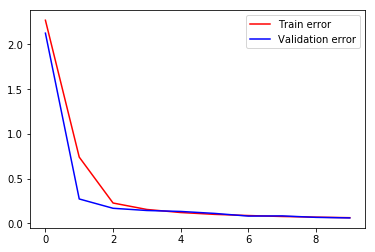

In [94]:
plt.gca().set_prop_cycle(color=['red', 'blue'])
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.legend(['Train error', 'Validation error'], loc='upper right')
plt.show()

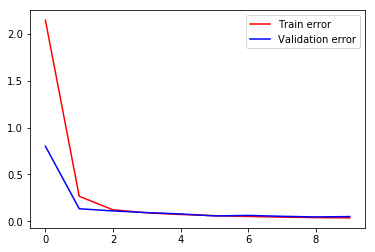

In [110]:
plt.gca().set_prop_cycle(color=['red', 'blue'])
plt.plot(train_loss_list)
plt.plot(val_loss_list)
plt.legend(['Train error', 'Validation error'], loc='upper right')
plt.show()

In [85]:
train_loss_list

[0.7314691506389529,
 0.10794591340729967,
 0.073024519553408024,
 0.056376514007628428,
 0.046507092357700459,
 0.03792369665836013,
 0.031841614914676755,
 0.028399308480157925,
 0.024907770936870657,
 0.020529020661066898]

In [86]:
val_loss_list

[0.13069483935832976,
 0.074157693237066266,
 0.061182237043976781,
 0.060755099356174472,
 0.042338862270116809,
 0.045260659605264666,
 0.04325741454958916,
 0.042915351875126365,
 0.046778520755469802,
 0.038920169137418269]

In [111]:
cnn.eval()
# correct = 0
# total = 0

success = 0
total = 0
for (images, labels) in test_loader:
    # To variable
    images, labels = Variable(images), Variable(labels)
    labels = labels.long()
        
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
#     predicted = outputs.data.max(1, keepdim=True)[1]

    # Add to total
    total += labels.size(0)
 
    # Add correctly classified images
    success += (predicted == labels.data).sum()
#     success += predicted.eq(labels.data.view_as(predicted)).sum()


print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * success / total))

Test Accuracy of the model on the 10000 test images: 98.0000 %
